<a href="https://colab.research.google.com/github/bhuwanadhikari/3-way-anova/blob/main/3_way_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-345295178>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")


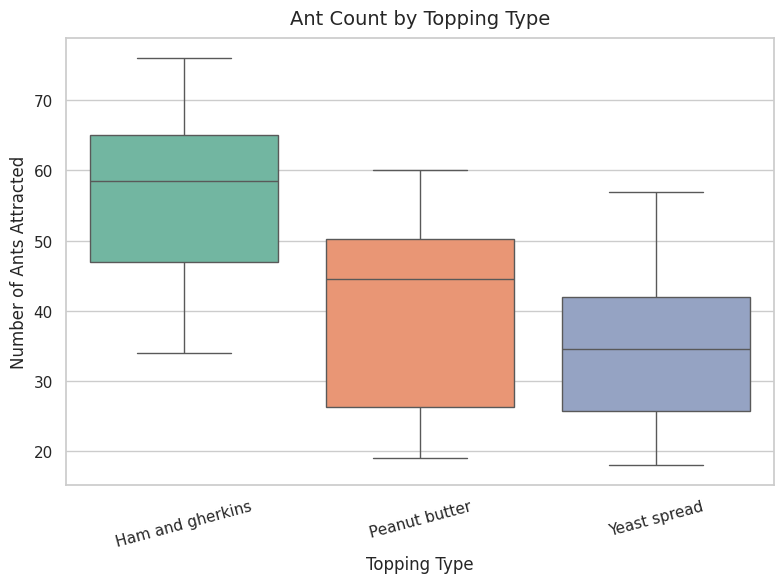

<ipython-input-14-345295178>:50: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


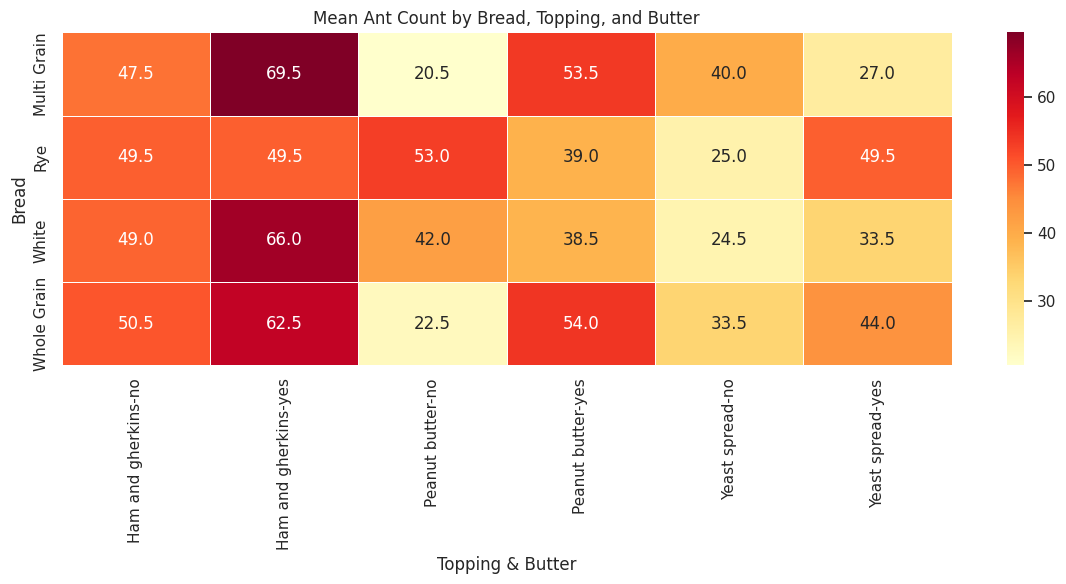

In [14]:
# prompt: read a file sandwich.csv that has my dataset

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('sandwich.csv')


# To get summary statistics for numerical columns:
# print(df.describe())


# Convert categorical variables to category dtype
df['bread'] = df['bread'].astype('category')
df['topping'] = df['topping'].astype('category')
df['butter'] = df['butter'].astype('category')


# Fit the three-way ANOVA model
model = ols('antCount ~ C(bread) * C(topping) * C(butter)', data=df).fit()


anova_table = sm.stats.anova_lm(model, typ=2)


anova_table


import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a boxplot to visualize ant counts by topping
plt.figure(figsize=(8, 6))
sns.boxplot(x="topping", y="antCount", data=df, palette="Set2")
plt.title("Ant Count by Topping Type", fontsize=14, pad=10)
plt.xlabel("Topping Type", fontsize=12)
plt.ylabel("Number of Ants Attracted", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Create pivot table for heatmap
pivot_table = df.pivot_table(
    values='antCount',
    index='bread',
    columns=['topping', 'butter'],
    aggfunc='mean'
)


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=0.5)
plt.title('Mean Ant Count by Bread, Topping, and Butter')
plt.ylabel('Bread')
plt.xlabel('Topping & Butter')
plt.tight_layout()
plt.show()


